<a href="https://colab.research.google.com/github/ouguro3/Study/blob/main/Python_Statistical_Analysis/04_discrete_random_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이산형 확률변수

### 1차원 이산형 확률변수

**이산형 확률변수 : 취할 수 있는 값이 이산적인 확률변수**  

**취할 수 있는 값이 이산적이다 = 정수**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

#### 1차원 이산형 확률변수의 정의

확률변수는 변수가 취할 수 있는 값과 그 값이 나오는 확률에 의해 정의된다  

이때 확률은 변수가 취할 수 있는 값 x 를 인수로 하는 함수로 볼 수 있기 때문에,  
`f(x) = P(X = x)` 로 하는 함수 f(x)를 생각할 수 있고, 이를 `확률질량함수` 또는 `확률함수` 라고 부른다  

확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응을 `확률분포` 라고 한다

따라서 확률변수의 확률분포가 결정되면 그 확률변수의 움직임이 정해진다 

In [2]:
# 불공정한 주사위를 예시로 파이썬으로 확인
x_set = np.array([1,2,3,4,5,6])

불공정한 주사위의 확률분포  

|눈|1|2|3|4|5|6|
|--|--|--|--|--|--|--|
|확률|1/21|2/21|3/21|4/21|5/21|6/21|

In [3]:
def f(x):
  if x in x_set:
    return x/21
  else:
    return 0

In [30]:
# X 는 x_set 과 f 를 요소로 하는 리스트로 구현한다
X = [x_set, f]

In [4]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

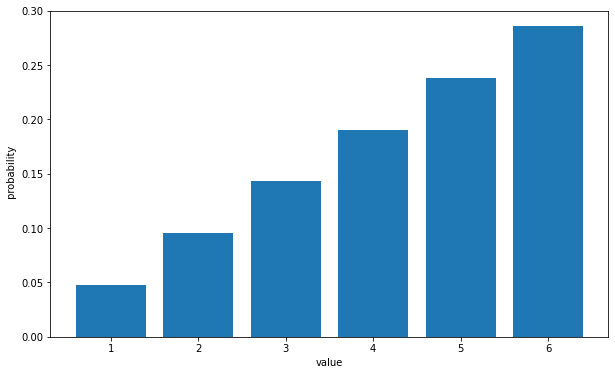

In [5]:
# 그래프로 표현
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel(' probability')

plt.show()

**확률의 성질**

확률은 절대적으로 0 이상으로, 모든 확률을 더하면 1이 되어야한다  

확률이 모두 0 이상인지는 np.all 함수를 사용하면 확인할 수 있다  

np.all은 모든요소가 참일 때만 참을 반환한다

In [6]:
np.all(prob >= 0)

True

In [7]:
# 확률의 총합 확인 (1이 되어야한다)
np.sum(prob)

1.000

**누적분포함수**

확률함수는 확률변수 X가 x가 될 때의 확률을 반환하는 함수지만,  
확률변수 X가 x 이하가 될때의 확률을 반환하는 함수로도 자주 사용된다  

이와같은 함수 F(x)를 `누적분포함수` 또는 `분포함수` 라 한다

In [8]:
def F(x):
  return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [9]:
F(3)

0.286

**확률변수의 변환**

확률변수의 변환이란 확률변수 X에 2를 곱하고 3을 더한 2X + 3과 같은 것으로,  
확률변수를 표준화할 때 중요한 연산이다  

2X + 3 을 확률변수 Y라고 하면, Y의 확률분포는 다음과 같다

In [10]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

#### 1차원 이산형 확률변수의 지표

**기댓값**

확률변수의 평균은 `기댓값` 이라고도 부른다  

기호로는 μ(뮤), 나 E(X) 라는 표기를 주로 사용한다

In [11]:
# 불공정한 주사위의 기댓값
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

확률변수의 기댓값은 확률변수를 무제한 시행하여 얻는 실현값의 평균이다  
무제한은 무리지만 주사위를 100만번 굴려보면

In [16]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333

기댓값과 일치하는데 이는 확률변수의 분산이나 공분산도 마찬가지다

변환한 확률변수도 확률변수이다  
그렇다면 변환한 확률변수의 기댓값도 생각해볼 수 있다  

예를들면 확률변수 X를 `2X + 3` 으로 변환한 확률변수 Y의 기댓값에 대해 생각해보면  


$$E(Y) = E(2X + 3) = \sum_{k}(2x_k + 3)f(x_k)$$

이런 식으로 정의된다  

더 일반화하면, 확률변수 X의 함수 g(X)의 기댓값을 정의할 수 있다  

이 수식을 기댓값의 함수로 구현해보면 아래와 같다

In [22]:
def E(X, g=lambda x: x):
  x_set, f = X
  return np.sum([g(x_k) * f(x_k) for x_k in x_set])

g에 아무것도 지정하지 않으면 확률변수 X의 기댓값이 구해진다

In [31]:
E(X)

4.333

확률변수 Y = 2X + 3의 기댓값은 다음과 같이 계산할 수 있다

In [32]:
E(X, g=lambda x: 2*x + 3)

11.667

기댓값에는 선형성이라는 성질이 있는데,  이 성질을 사용하여 aX + b와 같이  
변환한 확률변수의 기댓값을 X의 기댓값으로 구할 수 있다

기댓값의 선형성
___
a,b를 실수, X를 확률변수로 했을 때
$$E(aX + b) = aE(X) + b$$
가 성립한다

In [33]:
# 확인 
2 * E(X) + 3

11.667